In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

In [2]:
import numpy as np
import networkx as nx
import pandas as pd

# Import our refactored functions
from scripts import (
    load_graph_from_csv,
    create_graphs_from_edgelist,
    calculate_distance_matrices,
    solve_pmedian_problem,
    extract_distances_from_solution,
    create_results_dataframe,
    draw_graph_with_centers,
    plot_multiple_quantile_distributions,
    draw_networkx_auto,
    prune_leaf_nodes
)

In [3]:
EDGELIST_FILE = 'yekaterinburg_small_speed_history_cleared.edgelist'
NUM_FACILITIES = 6  # Number of centers to place (p parameter)
SOLVER_PATH = '/usr/local/bin/glpsol'  # Configurable solver path

In [4]:
print("Creating graph representations...")
igraph_graph, networkx_graph = create_graphs_from_edgelist(EDGELIST_FILE)
print(f"Created graphs with {igraph_graph.vcount()} vertices and {igraph_graph.ecount()} edges")

Creating graph representations...
Loading graph from edgelist: yekaterinburg_small_speed_history_cleared.edgelist
Loaded NetworkX graph with 791 nodes and 1231 edges
Interpolating 290 speed attributes...


/home/d-uspenskii/transport_flows/compare_distances/scripts/graph_operations.py:275: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  edges_df['weight'] = 1.0


Total zeros in speed columns: 0
Total nan in speed columns: 0
Creating igraph


Creating nx_graph: 100%|██████████| 1231/1231 [00:00<00:00, 1726.14it/s]

Created graphs with 791 vertices and 1231 edges


In [5]:
# This functionality is available but not used in the main analysis
# pruned_graph = prune_leaf_nodes(networkx_graph)
# print(f"Pruned graph would have {len(pruned_graph.nodes())} nodes")

In [6]:
print("Calculating distance matrices...")
protected_distances, resistance_distances, geodesic_distances = calculate_distance_matrices(
    igraph_graph, networkx_graph
)
print(f"- Protected distances: {protected_distances.shape}")
print(f"- Resistance distances: {resistance_distances.shape}")
print(f"- Geodesic distances: {geodesic_distances.shape}")

Calculating distance matrices...
Speed attributes detected. Using speed-based protected distances...
Found 288 time intervals for speed analysis


Processing time intervals:   0%|          | 0/288 [00:00<?, ?it/s]

Processing time intervals:   0%|          | 1/288 [00:00<03:17,  1.45it/s]


- Protected distances: (791, 791)
- Resistance distances: (791, 791)
- Geodesic distances: (791, 791)


In [7]:
# protected_distances = protected_distances.iloc[:200, :200]
# resistance_distances = resistance_distances.iloc[:200, :200]
# geodesic_distances = geodesic_distances.iloc[:200, :200]

In [8]:
num_clients = len(networkx_graph.nodes)
num_locations = len(networkx_graph.nodes)
num_facilities = NUM_FACILITIES

print(f"Problem parameters:")
print(f"- Number of clients: {num_clients}")
print(f"- Number of potential locations: {num_locations}")
print(f"- Number of facilities to place: {num_facilities}")

Problem parameters:
- Number of clients: 791
- Number of potential locations: 791
- Number of facilities to place: 6


300x300 работает нормально

In [9]:
print("\nSolving P-median problem with geodesic distances...")
geodesic_solution = solve_pmedian_problem(
    geodesic_distances, 
    num_facilities, 
    solver_path=SOLVER_PATH
)
print("Geodesic solution:")
print(geodesic_solution)
print(f"Selected vertices: {list(geodesic_solution.keys())}")


Solving P-median problem with geodesic distances...
Computing warm start solution with Teitz-Bart heuristic...
Starting Teitz and Bart heuristic...
Initial random solution cost: 9535
Found improvement: 834.00. New cost: 8701.00
Found improvement: 612.00. New cost: 8089.00
Found improvement: 235.00. New cost: 7854.00
Found improvement: 143.00. New cost: 7711.00
Found improvement: 104.00. New cost: 7607.00
No further improvements possible. Heuristic finished.
Heuristic solution objective: 7607.00
Heuristic facilities: ['748', '1135', '1514', '988', '830', '882']
Geodesic solution:
{'748': ['572', '573', '574', '575', '576', '577', '578', '579', '580', '581', '582', '583', '584', '585', '586', '737', '741', '742', '743', '744', '745', '746', '747', '748', '749', '750', '751', '752', '753', '754', '755', '772', '773', '774', '775', '776', '777', '778', '779', '780', '781', '782', '783', '784', '785', '786', '787', '788', '789', '790', '791', '792', '799', '800', '801', '802', '803', '804'

In [10]:
print("\nSolving P-median problem with resistance distances...")
resistance_solution = solve_pmedian_problem(
    resistance_distances, 
    num_facilities, 
    solver_path=SOLVER_PATH
)
print("Resistance solution:")
print(resistance_solution)
print(f"Selected vertices: {list(resistance_solution.keys())}")


Solving P-median problem with resistance distances...
Computing warm start solution with Teitz-Bart heuristic...
Starting Teitz and Bart heuristic...
Initial random solution cost: 5304.109888056173
Found improvement: 631.26. New cost: 4672.85
Found improvement: 360.70. New cost: 4312.15
Found improvement: 206.66. New cost: 4105.49
Found improvement: 121.51. New cost: 3983.98
Found improvement: 75.78. New cost: 3908.21
Found improvement: 67.25. New cost: 3840.95
Found improvement: 23.45. New cost: 3817.51
No further improvements possible. Heuristic finished.
Heuristic solution objective: 3817.51
Heuristic facilities: ['779', '1014', '1645', '1693', '1129', '954']
Resistance solution:
{'779': ['749', '750', '751', '752', '753', '754', '755', '772', '773', '774', '775', '776', '777', '778', '779', '780', '781', '782', '783', '784', '785', '786', '787', '788', '789', '790', '791', '792', '793', '794', '795', '796', '797', '871', '872', '873', '874', '875', '913', '914', '915', '1158', '11

In [11]:
print("\nSolving P-median problem with protected distances...")
protected_solution = solve_pmedian_problem(
    protected_distances, 
    num_facilities, 
    solver_path=SOLVER_PATH
)
print("Protected solution:")
print(protected_solution)
print(f"Selected vertices: {list(protected_solution.keys())}")


Solving P-median problem with protected distances...
Computing warm start solution with Teitz-Bart heuristic...
Starting Teitz and Bart heuristic...
Initial random solution cost: 16.298579885906335
Found improvement: 4.20. New cost: 12.10


Found improvement: 1.26. New cost: 10.84
Found improvement: 0.89. New cost: 9.95
Found improvement: 0.55. New cost: 9.40
Found improvement: 0.19. New cost: 9.20
Found improvement: 0.03. New cost: 9.18
Found improvement: 0.00. New cost: 9.17
Found improvement: 0.00. New cost: 9.17
No further improvements possible. Heuristic finished.
Heuristic solution objective: 9.17
Heuristic facilities: ['882', '1006', '1135', '928', '798', '1514']
Protected solution:
{'882': ['846', '847', '848', '849', '850', '851', '852', '853', '854', '855', '856', '857', '858', '859', '860', '861', '862', '863', '864', '865', '866', '867', '868', '869', '870', '871', '872', '873', '874', '876', '877', '878', '879', '880', '881', '882', '883', '884', '887', '888', '889', '893', '894', '895', '896', '897', '1777', '1778', '1779', '1780', '1781', '1782', '1783', '1784', '1785', '1786', '1787', '1788', '1789', '1790', '1791', '1792', '1793', '1794', '1795', '1796', '1797', '1798', '1799', '1800', '1801', '1802', '18


Visualizing original graph...


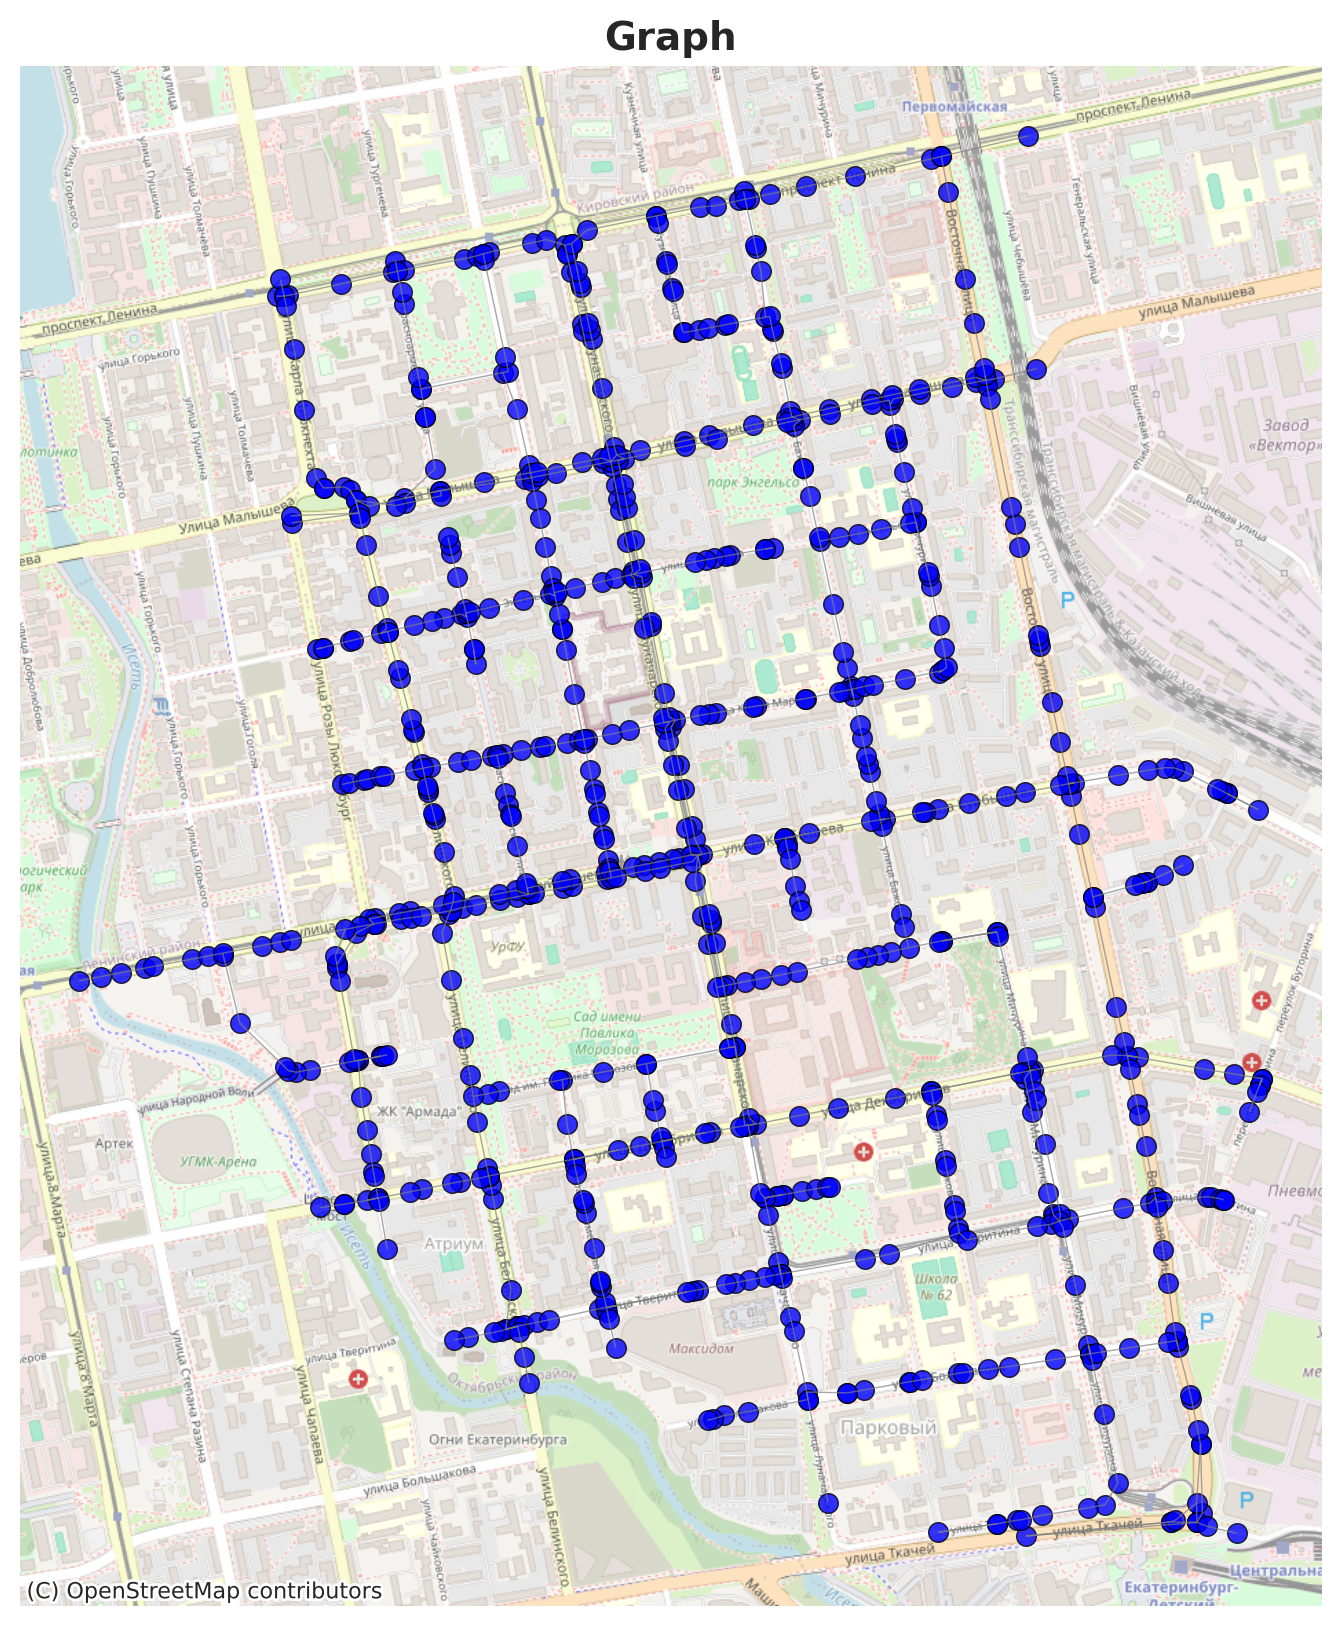

In [12]:
print("\nVisualizing original graph...")
# nx.draw_networkx(networkx_graph)
# plt.title("Original Graph")
# plt.show()
draw_networkx_auto(networkx_graph)

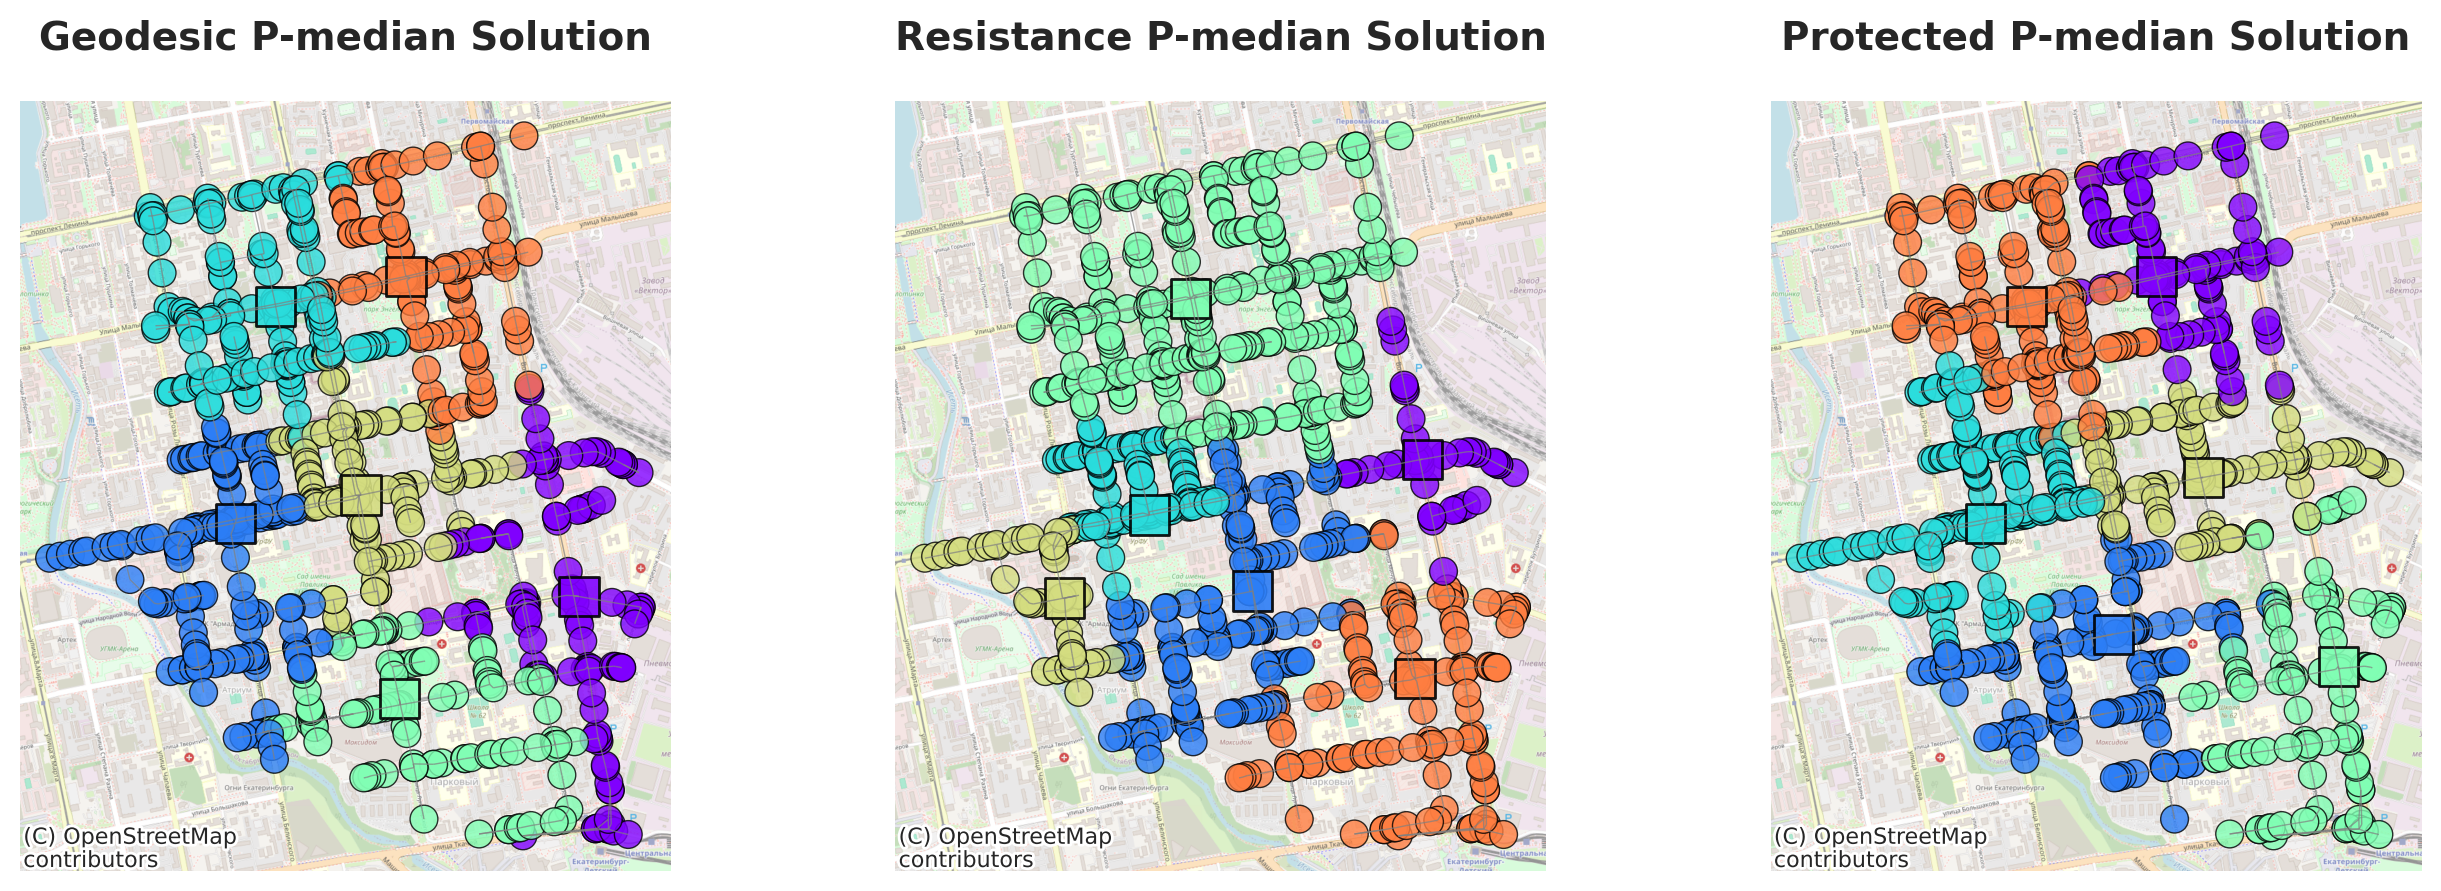

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

draw_graph_with_centers(
    networkx_graph, 
    geodesic_solution, 
    title='Geodesic P-median Solution',
    ax = axes[0]
)

draw_graph_with_centers(
    networkx_graph, 
    resistance_solution, 
    title='Resistance P-median Solution',
    ax = axes[1]
)

draw_graph_with_centers(
    networkx_graph, 
    protected_solution, 
    title='Protected P-median Solution',
    ax = axes[2]
)

In [14]:
print("\nCalculating protected distances dictionary for detailed analysis...")
protected_dict = {
    (row_name, col_name): protected_distances.loc[row_name, col_name]
    for row_name in protected_distances.index
    for col_name in protected_distances.columns
}
print(f"Protected distances dictionary contains {len(protected_dict)} entries")


Calculating protected distances dictionary for detailed analysis...


Protected distances dictionary contains 625681 entries


In [15]:
print("Extracting distances for geodesic solution analysis...")
geodesic_analysis_distances = extract_distances_from_solution(
    geodesic_solution, 
    protected_dict
)
print(f"Extracted {len(geodesic_analysis_distances)} distance values")

Extracting distances for geodesic solution analysis...
Extracted 791 distance values


In [16]:
print("Extracting distances for resistance solution analysis...")
resistance_analysis_distances = extract_distances_from_solution(
    resistance_solution, 
    protected_dict
)
print(f"Extracted {len(resistance_analysis_distances)} distance values")

Extracting distances for resistance solution analysis...
Extracted 791 distance values


In [17]:
print("Extracting distances for protected solution analysis...")
protected_analysis_distances = extract_distances_from_solution(
    protected_solution, 
    protected_dict
)
print(f"Extracted {len(protected_analysis_distances)} distance values")

Extracting distances for protected solution analysis...
Extracted 791 distance values


Plotting quantile distributions comparison...


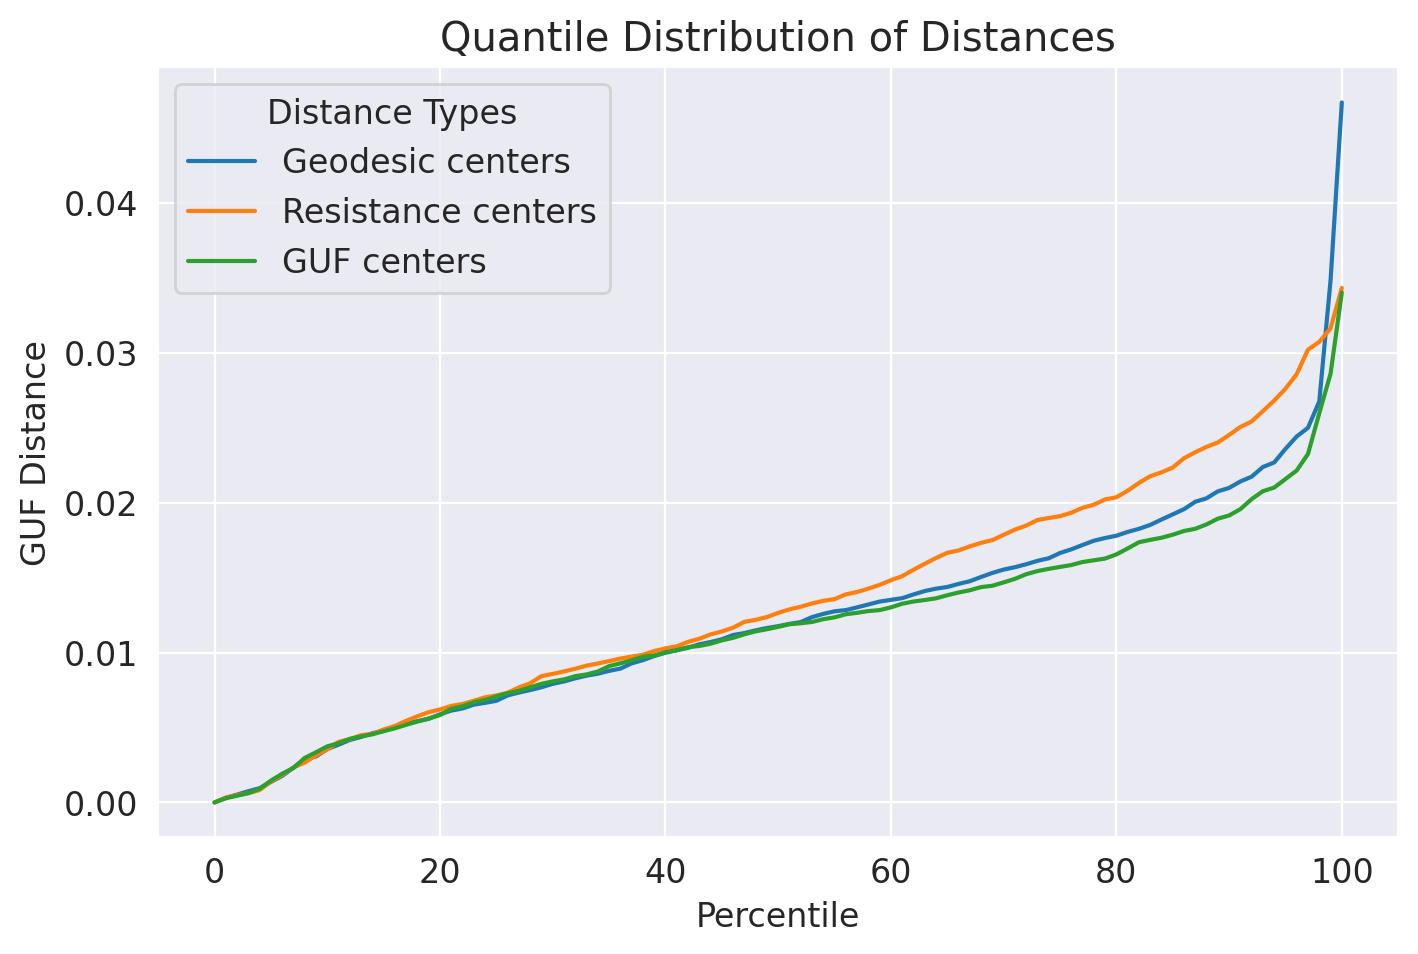

In [18]:
print("Plotting quantile distributions comparison...")
plot_multiple_quantile_distributions(
    [geodesic_analysis_distances, resistance_analysis_distances, protected_analysis_distances],
    ['Geodesic centers', 'Resistance centers', 'GUF centers']
)


In [19]:
print("Creating results DataFrame and performing statistical analysis...")
results_df = create_results_dataframe(
    geodesic_analysis_distances,
    resistance_analysis_distances, 
    protected_analysis_distances
)

# Calculate quantiles for analysis
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
statistical_summary = results_df.describe(percentiles=quantiles)

print("Statistical Summary:")
print(statistical_summary)

Creating results DataFrame and performing statistical analysis...
Statistical Summary:
         geodesic  resistance   protected
count  791.000000  791.000000  791.000000
mean     0.012168    0.013466    0.011598
std      0.007091    0.007949    0.006152
min      0.000000    0.000000    0.000000
10%      0.003562    0.003541    0.003744
20%      0.005879    0.006199    0.005833
30%      0.007915    0.008579    0.008079
40%      0.009991    0.010284    0.010029
50%      0.011764    0.012653    0.011720
60%      0.013521    0.014832    0.013019
70%      0.015541    0.017861    0.014687
80%      0.017801    0.020370    0.016555
90%      0.020993    0.024526    0.019152
max      0.046720    0.034337    0.034033


In [20]:
print("\n" + "="*60)
print("FINAL RESULTS SUMMARY")
print("="*60)

print(f"\nProblem Configuration:")
print(f"- Dataset: {EDGELIST_FILE}")
print(f"- Number of facilities: {num_facilities}")
print(f"- Graph size: {num_clients} nodes, {igraph_graph.ecount()} edges")

print(f"\nSolution Comparison:")
print(f"- Geodesic centers: {list(geodesic_solution.keys())}")
print(f"- Resistance centers: {list(resistance_solution.keys())}")
print(f"- Protected centers: {list(protected_solution.keys())}")

print(f"\nDistance Analysis (median values):")
print(f"- Geodesic solution median distance: {np.median(geodesic_analysis_distances):.2f}")
print(f"- Resistance solution median distance: {np.median(resistance_analysis_distances):.2f}")
print(f"- Protected solution median distance: {np.median(protected_analysis_distances):.2f}")

print("\nAnalysis complete!")


FINAL RESULTS SUMMARY

Problem Configuration:
- Dataset: yekaterinburg_small_speed_history_cleared.edgelist
- Number of facilities: 6
- Graph size: 791 nodes, 1231 edges

Solution Comparison:
- Geodesic centers: ['748', '1135', '1514', '988', '830', '882']
- Resistance centers: ['779', '1014', '1645', '1693', '1129', '954']
- Protected centers: ['882', '1006', '1135', '928', '798', '1514']

Distance Analysis (median values):
- Geodesic solution median distance: 0.01
- Resistance solution median distance: 0.01
- Protected solution median distance: 0.01

Analysis complete!
